In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

from utils import get_cifar_dataloaders, train, test

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

EPOCH = 100
LEARNING_RATE = 1e-3 # 0.001
BATCH_SIZE = 64

AttributeError: partially initialized module 'torchvision' has no attribute 'extension' (most likely due to a circular import)

In [2]:
train_loader, validation_loader, test_loader = get_cifar_dataloaders(BATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Define the model architecture
class InzvaNet(nn.Module):
    """An Inzva exclusive neural network."""
    def __init__(self):
        super(InzvaNet, self).__init__()
        self.sequential = nn.Sequential(
            nn.ZeroPad2d(1), # 32x32x3 -> 34x34x3
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3), # 34x34x3 -> 32x32x32
            nn.LeakyReLU(), 
            nn.MaxPool2d(kernel_size=2, stride=2), # 32x32x32 -> 16x16x32 || #of channels will not change
            nn.ZeroPad2d(1),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), # 16x16x32 -> 14x14x64 (since no padding it will 16x16 -> 14x14) || #of channels will change since filter is channel dependent
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # 14x14x64 -> 7x7x64
            nn.Dropout(p=0.5), 
            nn.Flatten(), # 7x7x64 -> 3136 
            nn.Linear(4096, 10), # 3136 -> 10
            nn.Softmax()
        )

    def forward(self, x):
        return self.sequential(x)

model = InzvaNet()
model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [4]:
model, history = train(train_loader, model, criterion, optimizer, EPOCH, validation_loader=validation_loader)

Epoch 1/100
  1/704 ━━━━━━━━━━━━━━━━━━━━ 2:51 244ms/step - loss: 2.3026 - acc: 0.1289 - precision: 0.1289 - recall: 0.1289 - f1: 0.1289

/home/melihdarcan/.cache/pypoetry/virtualenvs/dlsg-cnn-aqO6POrr-py3.11/lib/python3.11/site-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
I0000 00:00:1727505432.860464  304028 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-28 09:37:12.863001: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


704/704 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 2.1886 - acc: 0.2555 - precision: 0.2555 - recall: 0.2555 - f1: 0.2555
Validation 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - val_loss: 2.0565 - val_acc: 0.3196 - val_precision: 0.3196 - val_recall: 0.3196 - val_f1: 0.3196
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - loss: 2.0570 - acc: 0.3979 - precision: 0.3979 - recall: 0.3979 - f1: 0.3979
Validation 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - val_loss: 2.0343 - val_acc: 0.4050 - val_precision: 0.4050 - val_recall: 0.4050 - val_f1: 0.4050
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - loss: 2.0289 - acc: 0.4276 - precision: 0.4276 - recall: 0.4276 - f1: 0.4276
Validation 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - val_loss: 2.0020 - val_acc: 0.4320 - val_precision: 0.4320 - val_recall: 0.4320 - val_f1: 0.4320
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - loss: 2.0049 - acc: 0.4548 - precision: 0.4548 - recall: 0.4548 - f1: 0.4548
Validatio

In [5]:
preds, ys, metrics = test(test_loader, model, criterion)

Test
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 1.7826 - acc: 0.6764 - precision: 0.6764 - recall: 0.6764 - f1: 0.6764


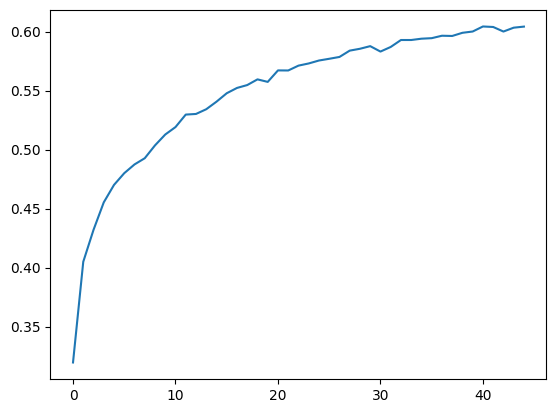

In [9]:
plt.plot(range(len(history["val_acc"])), history["val_acc"])

In [10]:
max(history["val_acc"])

tensor(0.6043)